## Douglas Decicino de Andrade

### Nº USP: 10883512

### Projeto 2 Redes Neurais

In [116]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.preprocessing import image
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
import pandas as pd
import seaborn as sns
from skimage.util import random_noise
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
import keras

# Questão 1 

#### Vamos criar o modelo indicado no trabalho.

In [2]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3), padding='same'))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(33,32,3), padding='same'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        2320      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          9

# Questão 2

Carregando a base  CIFAR-10 

In [89]:
(X_train_CIF, y_train_CIF), (X_test_CIF, y_test_CIF) = cifar10.load_data()

Carregando a base SVHN

In [90]:
train = sio.loadmat('train_32x32.mat')
test = sio.loadmat('test_32x32')

Agora vamos separar a base SVHN

In [91]:
X_train_SVHN = train['X']
y_train_SVHN = train['y']
X_test_SVHN = test['X']
y_test_SVHN = test['y']

Vamos ver como estão as dimensões das nossas bases

In [73]:
#Base CIFAR-10
((X_train_CIF.shape),(y_train_CIF.shape),(X_test_CIF.shape),(y_test_CIF.shape))

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [74]:
#Base SVHN
((X_train_SVHN.shape),(y_train_SVHN.shape),(X_test_SVHN.shape),(y_test_SVHN.shape))

((32, 32, 3, 73257), (73257, 1), (32, 32, 3, 26032), (26032, 1))

### a) Ao carregar a base de dados CIFAR-10 você irá notar que y_train e y_test têm duas dimensões. Transforme eles em vetores.

In [92]:
y_train_CIF = y_train_CIF[:,0]
y_train_CIF.shape

(50000,)

In [93]:
y_test_CIF = y_test_CIF[:,0]
y_test_CIF.shape

(10000,)

Agora vamos transformar as imagens e as classes para formatos que consomem menos RAM.

In [22]:
# X_train_CIF = np.float16(X_train_CIF)
# X_test_CIF = np.float16(X_test_CIF)
# y_train_CIF = y_train_CIF.astype(np.uint8)
# y_test_CIF = y_test_CIF.astype(np.uint8)

### b) Ao carregar a base de dados SVHN, e entender sua estrutura, você irá notar que X_train e X_test estão com as dimensões em uma ordem diferente da que usamos na aula (e que o Keras usa por padrão). Transforme tais arrayspara ter a ordem que normalmente usamos (id da imagem, linhas, colunas e canais)

In [94]:
X_train_SVHN = np.moveaxis(X_train_SVHN, -1, 0)
X_train_SVHN.shape

(73257, 32, 32, 3)

In [95]:
X_test_SVHN = np.moveaxis(X_test_SVHN, -1, 0)
X_test_SVHN.shape

(26032, 32, 32, 3)

Como podemos ver agora sim os arrays estão na ordem que precisamos

Agora vamos transformar as imagens e as classes para formatos que consomem menos RAM.

In [25]:
# X_train_SVHN = np.float16(X_train_SVHN)
# X_test_SVHN = np.float16(X_test_SVHN)
# y_train_SVHN = y_train_SVHN.astype(np.uint8)
# y_test_SVHN = y_test_SVHN.astype(np.uint8)

### c) Transforme o valor dos pixels das imagens para o intervalo [0; 1]

In [96]:
#SVHN
X_train_SVHN = X_train_SVHN/255.0
X_test_SVHN = X_test_SVHN/255.0

#CIFAR-10
X_train_CIF = X_train_CIF/255.0
X_test_CIF = X_test_CIF/255.0

In [27]:
#Checando se os dados foram normalizados.
(X_train_SVHN.min(),X_train_SVHN.max(),X_train_CIF.min(),X_train_CIF.max(),X_test_SVHN.min(),X_test_SVHN.max(),X_test_CIF.min(),X_test_CIF.max())

(0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0)

### d) Para cada uma das duas bases, compute:



#### ● Quantidade de imagens de treino e teste

In [81]:
#Quantidade de imagens de treino e teste
print("A quantidade de imagens para ao conjunto de treino da base CIFAR-10 é: ", y_train_CIF.shape[0])
print("A quantidade de imagens para ao conjunto de teste da base CIFAR-10 é: ", y_test_CIF.shape[0])
print("A quantidade de imagens para ao conjunto de treino da base SVHN é: ", y_train_SVHN.shape[0])
print("A quantidade de imagens para ao conjunto de teste da base SVHN é: ", y_test_SVHN.shape[0])

A quantidade de imagens para ao conjunto de treino da base CIFAR-10 é:  50000
A quantidade de imagens para ao conjunto de teste da base CIFAR-10 é:  10000
A quantidade de imagens para ao conjunto de treino da base SVHN é:  73257
A quantidade de imagens para ao conjunto de teste da base SVHN é:  26032


#### ● Tamanho (número de linhas, colunas e canais) das imagens

In [41]:
print('O número de linhas das imagens da base CIFAR-10 é: ', X_train_CIF.shape[1], '\n O número de colunas das imagens da base CIFAR-10 é: ', X_train_CIF.shape[2] ,'\n O número de canais  das imagens da base CIFAR-10 é: ',X_train_CIF.shape[3] )

O número de linhas das imagens da base CIFAR-10 é:  32 
 O número de colunas das imagens da base CIFAR-10 é:  32 
 O número de canais  das imagens da base CIFAR-10 é:  3


In [43]:
print('O número de linhas das imagens da base SVHN é: ', X_train_SVHN.shape[1], '\n O número de colunas das imagens da base SVHN é: ', X_train_SVHN.shape[2] ,'\n O número de canais  das imagens da base SVHN é: ',X_train_SVHN.shape[3] )

O número de linhas das imagens da base SVHN é:  32 
 O número de colunas das imagens da base SVHN é:  32 
 O número de canais  das imagens da base SVHN é:  3


##### ● Distribuição das classes

Vou passar os vetores das variáveis respostas de ambas as bases para um Pandas Series

In [60]:
y_train_CIF_pd = pd.Series(y_train_CIF)
y_test_CIF_pd = pd.Series(y_test_CIF)
y_train_SVHN_pd = pd.Series(y_train_SVHN[:,0])
y_test_SVHN_pd = pd.Series(y_test_SVHN[:,0])

Vamos agora ver como as classes da base CIFAR-10 estão distribuidas no nosso conjunto de treino e teste.

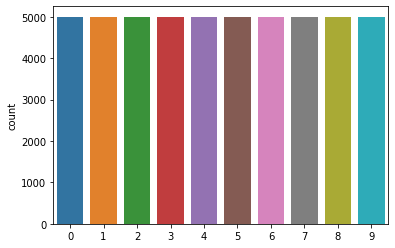

In [58]:
sns.countplot(y_train_CIF_pd)

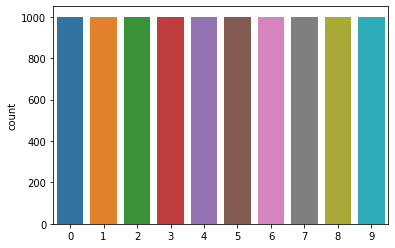

In [61]:
sns.countplot(y_test_CIF_pd)

Como podemos ver, a base CIFAR-10 é perfeitamente balanceada em ambos os conjuntos, possuindo 5 mil observações para cada classe no conjunto de treino e 1000 para cada classe no conjunto de teste.

Vamos agora ver como as classes da base SVHN estão distribuidas no nosso conjunto de treino e teste.

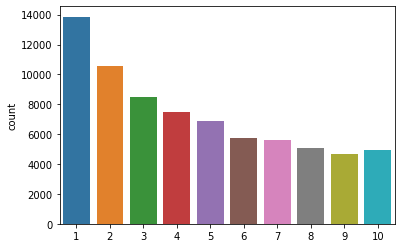

In [63]:
sns.countplot(y_train_SVHN_pd)

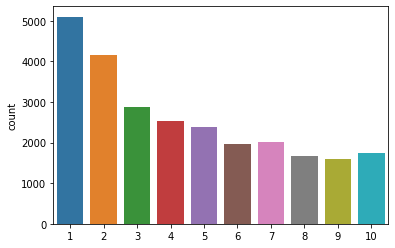

In [62]:
sns.countplot(y_test_SVHN_pd)

Como podemos ver, a base SVHN é desbalanceada em relação ao número de observações de cada classe, possuindo 5 mil observações para a classe 1 e menos de 2 mil para outras classes.

# Questão 3

### a) Gerar versões das duas bases de dados afetadas por ruído gaussiano com variâncias de 0.001 e 0.01, respectivamente

Vamos então gerar um novo conjunto de imagens de treino com ruidos para ambas as nossas bases

* 0.001 

In [36]:
#Base CIFAR-10
X_train_CIF_RN_0001 = np.zeros((len(X_train_CIF), 32, 32, 3))
for i in (np.arange(0,len(X_train_CIF))):
    X_train_CIF_RN_0001[i, :, :] = random_noise(X_train_CIF[i, :, :], mode='gaussian', var=0.001)
    
#Base SVHN
X_train_SVHN_RN_0001 = np.zeros((len(X_train_SVHN), 32, 32, 3))
for i in (np.arange(0,len(X_train_SVHN))):
    X_train_SVHN_RN_0001[i, :, :] = random_noise(X_train_SVHN[i, :, :], mode='gaussian', var=0.001)

* 0.01 

In [37]:
#Base CIFAR-10
X_train_CIF_RN_001 = np.zeros((len(X_train_CIF), 32, 32, 3))
for i in (np.arange(0,len(X_train_CIF))):
    X_train_CIF_RN_001[i, :, :] = random_noise(X_train_CIF[i, :, :], mode='gaussian', var=0.01)
    
#Base SVHN
X_train_SVHN_RN_001 = np.zeros((len(X_train_SVHN), 32, 32, 3))
for i in (np.arange(0,len(X_train_SVHN))):
    X_train_SVHN_RN_001[i, :, :] = random_noise(X_train_SVHN[i, :, :], mode='gaussian', var=0.01)

### b) Mostrar uma imagem de cada uma das classes em 3 versões (original, Gauss 0.001 e Gauss 0.01). Isso deve ser feito para as duas bases (CIFAR-10 e SVHN).

Primeiramente vou juntar o array das classes com o array das imagens para podermos selecionar as imagens por classe.

In [176]:
SVHN_RN_001 = X_train_SVHN_RN_001 

In [179]:
SVHN_RN_001 = SVHN_RN_001

In [82]:
 y_train_SVHN

array([[1],
       [9],
       [2],
       ...,
       [1],
       [6],
       [9]], dtype=uint8)

In [121]:
X_train_CIF[0, :, :]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

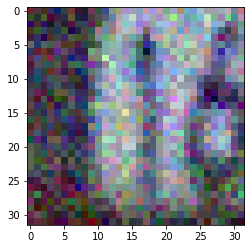

In [38]:
plt.imshow(X_train_SVHN_RN_001[20,:, :])

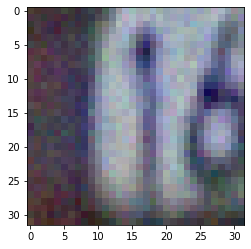

In [39]:
plt.imshow(X_train_SVHN_RN_0001[20, :, :])

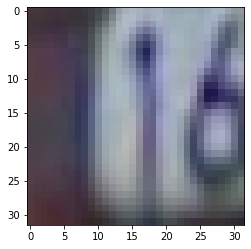

In [40]:
plt.imshow(X_train_SVHN[20, :, :])

In [112]:
random_noise(X_train_CIF[0, :, :], mode='gaussian', var=0.1)

array([[[0.        , 0.34236082, 0.        ],
        [0.        , 0.49305782, 0.        ],
        [0.8214383 , 0.6030443 , 0.02111929],
        ...,
        [0.79512032, 0.14969808, 0.28352162],
        [0.31752973, 0.01463475, 0.12492793],
        [0.90253468, 0.078342  , 0.43855781]],

       [[0.1616635 , 0.        , 0.24374666],
        [0.        , 0.13441808, 0.        ],
        [0.        , 0.3243216 , 0.25685179],
        ...,
        [0.81601194, 0.        , 0.01633585],
        [0.62322285, 0.18402664, 0.28128031],
        [0.49798841, 0.28656366, 0.49455101]],

       [[0.60987648, 0.        , 0.        ],
        [0.26427765, 0.29095406, 0.68537247],
        [0.18757426, 0.22803376, 0.19613984],
        ...,
        [0.96807958, 0.34027595, 0.        ],
        [0.28785578, 0.30751261, 0.58768286],
        [0.7596096 , 0.42109057, 0.27151571]],

       ...,

       [[1.        , 0.03313582, 0.77737523],
        [1.        , 0.97072272, 0.5579536 ],
        [1.        , 1

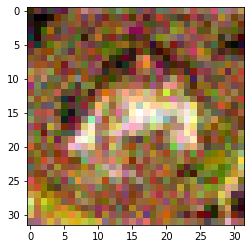

In [41]:
plt.imshow(random_noise(X_train_CIF[0, :, :], mode='gaussian', var=0.01), cmap='gray')

# Questão 4

In [42]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## Treinando modelos para a base CIFAR-10

In [98]:
y_train_CIF = to_categorical(y_train_CIF)
y_test_CIF = to_categorical(y_test_CIF)

In [160]:
model.fit(
    X_train_CIF, y_train_CIF,    
    epochs=10,
    verbose=1)

Epoch 1/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.7990 - accuracy: 0.3479
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.3638 - accuracy: 0.51240s - loss:
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.2152 - accuracy: 0.5673
Epoch 4/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.1130 - accuracy: 0.6057
Epoch 5/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.0370 - accuracy: 0.6323
Epoch 6/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9849 - accuracy: 0.6501
Epoch 7/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9404 - accuracy: 0.6701
Epoch 8/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.9033 - accuracy: 0.6821
Epoch 9/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8697 - accuracy: 0.6942
Epoch 10/10
1563/1563 [==============================]

In [161]:
model.save('CNN_train_CIF_NORMAL')

INFO:tensorflow:Assets written to: CNN_train_CIF_NORMAL\assets


In [162]:
model.fit(
    X_train_CIF_RN_0001, y_train_CIF,    
    epochs=10,
    verbose=1)

Epoch 1/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8511 - accuracy: 0.69900s - loss:
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8250 - accuracy: 0.7099
Epoch 3/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8046 - accuracy: 0.7164
Epoch 4/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7829 - accuracy: 0.7225
Epoch 5/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.7658 - accuracy: 0.7271
Epoch 6/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.7482 - accuracy: 0.7355
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7303 - accuracy: 0.7424
Epoch 8/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7201 - accuracy: 0.7463
Epoch 9/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7095 - accuracy: 0.7479
Epoch 10/10
1563/1563 [==============================]

In [163]:
model.save('CNN_train_CIF_0001')

INFO:tensorflow:Assets written to: CNN_train_CIF_0001\assets


In [164]:
model.fit(
    X_train_CIF_RN_001, y_train_CIF,    
    epochs=10,
    verbose=1)

Epoch 1/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9477 - accuracy: 0.6614
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8883 - accuracy: 0.6830
Epoch 3/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.8565 - accuracy: 0.6943
Epoch 4/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8364 - accuracy: 0.70050s - loss: 0.8
Epoch 5/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.8141 - accuracy: 0.70972s - loss: 0
Epoch 6/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.7921 - accuracy: 0.7150
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7768 - accuracy: 0.7217
Epoch 8/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7626 - accuracy: 0.7274
Epoch 9/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7491 - accuracy: 0.7328
Epoch 10/10
1563/1563 [===============

In [165]:
model.save('CNN_train_CIF_001')

INFO:tensorflow:Assets written to: CNN_train_CIF_001\assets


## Treinando modelos para a base SVHN

In [102]:
lb = LabelBinarizer()
y_train_SVHN = lb.fit_transform(y_train_SVHN)
y_test_SVHN = lb.fit_transform(y_test_SVHN)

In [105]:
model.fit(
    X_train_SVHN, y_train_SVHN,    
    epochs=10,
    verbose=1)

Epoch 1/10
2290/2290 [==============================] - 56s 24ms/step - loss: 0.8613 - accuracy: 0.7241
Epoch 2/10
2290/2290 [==============================] - 52s 23ms/step - loss: 0.4748 - accuracy: 0.8561
Epoch 3/10
2290/2290 [==============================] - 52s 23ms/step - loss: 0.3971 - accuracy: 0.8813
Epoch 4/10
2290/2290 [==============================] - 54s 24ms/step - loss: 0.3535 - accuracy: 0.8943
Epoch 5/10
2290/2290 [==============================] - 53s 23ms/step - loss: 0.3283 - accuracy: 0.9017
Epoch 6/10
2290/2290 [==============================] - 52s 23ms/step - loss: 0.3034 - accuracy: 0.9092
Epoch 7/10
2290/2290 [==============================] - 52s 23ms/step - loss: 0.2867 - accuracy: 0.9140
Epoch 8/10
2290/2290 [==============================] - 51s 22ms/step - loss: 0.2716 - accuracy: 0.9186
Epoch 9/10
2290/2290 [==============================] - 53s 23ms/step - loss: 0.2590 - accuracy: 0.92190s - loss: 0.2591 - accuracy: 
Epoch 10/10
2290/2290 [===========

In [106]:
model.save('CNN_train_SVHN_NORMAL')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: CNN_train_SVHN_NORMAL\assets


In [108]:
model.fit(
    X_train_SVHN_RN_0001, y_train_SVHN,    
    epochs=10,
    verbose=1)

Epoch 1/10
2290/2290 [==============================] - 53s 23ms/step - loss: 0.2828 - accuracy: 0.9128
Epoch 2/10
2290/2290 [==============================] - 52s 23ms/step - loss: 0.2654 - accuracy: 0.9193
Epoch 3/10
2290/2290 [==============================] - 52s 23ms/step - loss: 0.2537 - accuracy: 0.9229
Epoch 4/10
2290/2290 [==============================] - 54s 24ms/step - loss: 0.2427 - accuracy: 0.9261
Epoch 5/10
2290/2290 [==============================] - 52s 23ms/step - loss: 0.2352 - accuracy: 0.9277
Epoch 6/10
2290/2290 [==============================] - 52s 23ms/step - loss: 0.2289 - accuracy: 0.9298
Epoch 7/10
2290/2290 [==============================] - 57s 25ms/step - loss: 0.2205 - accuracy: 0.9319
Epoch 8/10
2290/2290 [==============================] - 58s 25ms/step - loss: 0.2149 - accuracy: 0.93330s - loss: 0.2147 - accuracy: 
Epoch 9/10
2290/2290 [==============================] - 61s 26ms/step - loss: 0.2069 - accuracy: 0.9358
Epoch 10/10
2290/2290 [===========

In [109]:
model.save('CNN_train_SVHN_0001')

INFO:tensorflow:Assets written to: CNN_train_SVHN_0001\assets


In [110]:
model.fit(
     X_train_SVHN_RN_001, y_train_SVHN,    
    epochs=10,
    verbose=1)

Epoch 1/10
2290/2290 [==============================] - 56s 24ms/step - loss: 0.4522 - accuracy: 0.8558
Epoch 2/10
2290/2290 [==============================] - 54s 24ms/step - loss: 0.3938 - accuracy: 0.8740
Epoch 3/10
2290/2290 [==============================] - 59s 26ms/step - loss: 0.3661 - accuracy: 0.8846
Epoch 4/10
2290/2290 [==============================] - 60s 26ms/step - loss: 0.3512 - accuracy: 0.8884
Epoch 5/10
2290/2290 [==============================] - 61s 26ms/step - loss: 0.3382 - accuracy: 0.8914
Epoch 6/10
2290/2290 [==============================] - 52s 23ms/step - loss: 0.3255 - accuracy: 0.8958
Epoch 7/10
2290/2290 [==============================] - 57s 25ms/step - loss: 0.3158 - accuracy: 0.8992
Epoch 8/10
2290/2290 [==============================] - 62s 27ms/step - loss: 0.3074 - accuracy: 0.9015
Epoch 9/10
2290/2290 [==============================] - 62s 27ms/step - loss: 0.2949 - accuracy: 0.9061
Epoch 10/10
2290/2290 [==============================] - 62s 27m

In [111]:
model.save('CNN_train_SVHN_001')

INFO:tensorflow:Assets written to: CNN_train_SVHN_001\assets


# Questão 5

#### a) Calcular a acurácia dos modelos em todas as versões da base de teste. Por exemplo, para o modelo treinado com os dados de treinamento da CIFAR-10 original devemos computar sua acurácia nas bases de teste original, Gauss 0.001 e Gauss 0.01. Ou seja, para cada um dos modelos vamos computar 3 acurácias

## CIFAR-10

* Normal

In [138]:
model = keras.models.load_model('CNN_train_CIF')

In [142]:
model.evaluate(X_test_CIF, y_test_CIF)

313/313 [==============================] - 3s 8ms/step - loss: 0.8808 - accuracy: 0.6943


[0.8808009624481201, 0.6942999958992004]

* 0.01

In [143]:
model = keras.models.load_model('CNN_train_CIF_0001')

In [144]:
model.evaluate(X_test_CIF, y_test_CIF)

313/313 [==============================] - 3s 8ms/step - loss: 0.9508 - accuracy: 0.6902


[0.9508273601531982, 0.6901999711990356]

* 0.001

In [145]:
model = keras.models.load_model('CNN_train_CIF_001')

In [146]:
model.evaluate(X_test_CIF, y_test_CIF)

313/313 [==============================] - 2s 7ms/step - loss: 1.2442 - accuracy: 0.6030


[1.244201898574829, 0.6029999852180481]

## SVHN

* Normal

In [149]:
model = keras.models.load_model('CNN_train_SVHN_NORMAL')

In [155]:
model.evaluate(X_test_SVHN, y_test_SVHN)

814/814 [==============================] - 6s 8ms/step - loss: 0.3251 - accuracy: 0.9100


[0.3250719904899597, 0.9099953770637512]

* 0.001

In [156]:
model = keras.models.load_model('CNN_train_SVHN_0001')

In [157]:
model.evaluate(X_test_SVHN, y_test_SVHN)

814/814 [==============================] - 7s 8ms/step - loss: 0.3536 - accuracy: 0.9048


[0.3535562753677368, 0.9048478603363037]

* 0.01

In [158]:
model = keras.models.load_model('CNN_train_SVHN_001')

In [159]:
model.evaluate(X_test_SVHN, y_test_SVHN)

814/814 [==============================] - 6s 7ms/step - loss: 0.4001 - accuracy: 0.8944


[0.4001328945159912, 0.8943607807159424]